In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/AI_Assignment

/content/drive/MyDrive/AI_Assignment


In [4]:
df = pd.read_csv('WHR-2024-5CS037.csv')

##1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.


In [5]:
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

2. Identify the number of rows and columns in the dataset.


In [6]:
print("Number of rows and columns:")
print(df.shape)

Number of rows and columns:
(143, 9)


3. List all the columns and their data types.


In [7]:
print("Columns and data types:")
print(df.dtypes)

Columns and data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.


In [8]:
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"\nScore - Mean: {mean_score},\n Median: {median_score},\n Std Dev: {std_score}")



Score - Mean: 5.52758041958042,
 Median: 5.785,
 Std Dev: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.


In [9]:
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"\nCountry with highest happiness score: {max_score_country}")
print(f"Country with lowest happiness score: {min_score_country}")



Country with highest happiness score: Finland
Country with lowest happiness score: Afghanistan


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.


In [10]:
missing_values = df.isnull().sum()

print("\nMissing values in each column:")
print(missing_values[missing_values > 0])



Missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [11]:
filtered_df = df[df['score'] > 7.5]

print("\nFiltered dataset (score > 7.5):")
print(filtered_df)



Filtered dataset (score > 7.5):
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [12]:
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

print("\nTop 10 countries by GDP per Capita:")
print(sorted_df.head(10))


Top 10 countries by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [13]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nDataset with Happiness Category:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))



Dataset with Happiness Category:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


##2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


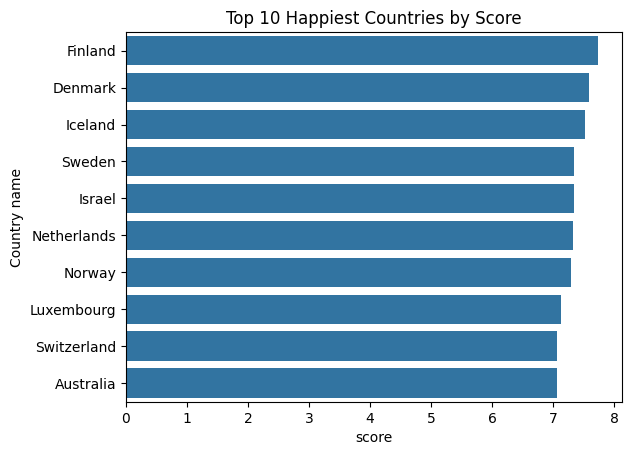

In [14]:
top_10_happiest = df.nlargest(10, 'score')
sns.barplot(x='score', y='Country name', data=top_10_happiest)
plt.title('Top 10 Happiest Countries by Score')
plt.show()


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.


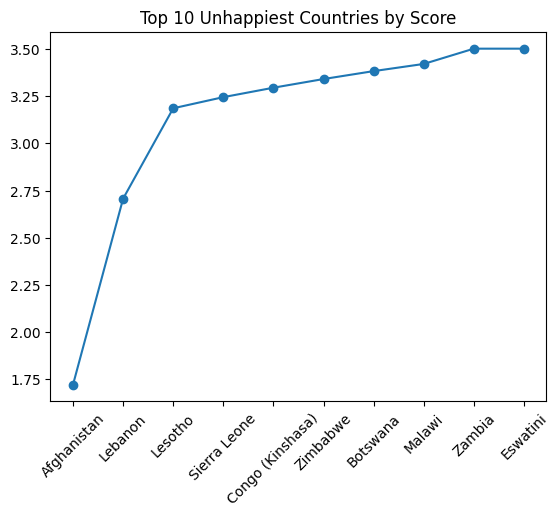

In [15]:
top_10_unhappiest = df.nsmallest(10, 'score')
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xticks(rotation=45)
plt.show()


• Plot a histogram for the Score column to show its distribution and also interpret.


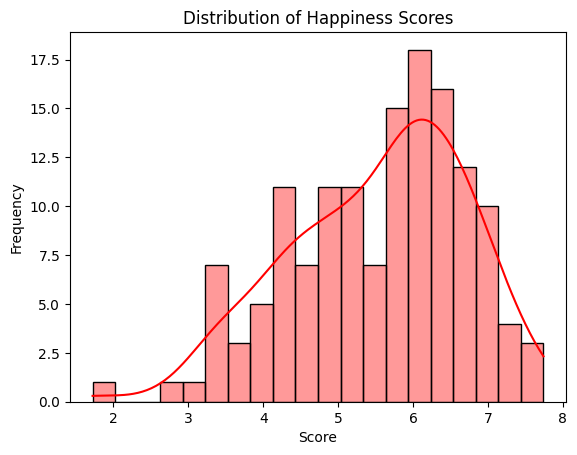

In [16]:
sns.histplot(df['score'], bins=20, color='red', alpha=0.4,kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

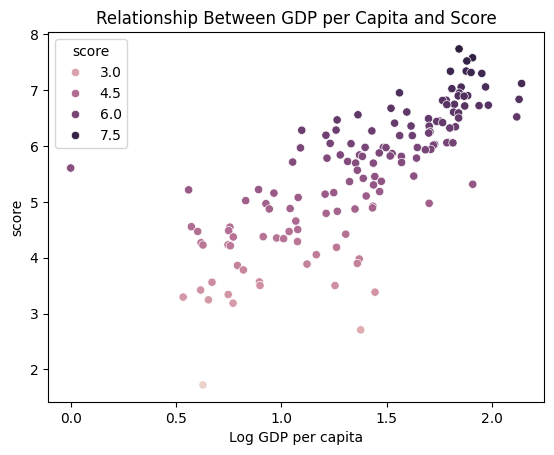

In [17]:
sns.scatterplot(x='Log GDP per capita', y='score', data=df,hue='score')
plt.title('Relationship Between GDP per Capita and Score')
plt.show()


##3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]



In [18]:
south_asian_countries = [ "Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}


In [19]:
filtered_dataset = df[df['Country name'].isin(south_asian_countries)]
filtered_dataset

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3. Save the filtered dataframe as separate CSV files for future use.

In [20]:
filtered_dataset.to_csv('south_asia_dataset.csv', index=False)
print("Filtered dataset saved as 'south_asia_dataset.csv'")

Filtered dataset saved as 'south_asia_dataset.csv'


##Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy

In [48]:
south_asia_dataset = pd.read_csv('south_asia_dataset.csv')
south_asia_dataset

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
5,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


2. Rank the South Asian countries based on the Composite Score in descending order.


In [52]:
south_asia_dataset['Composite Score'] = (
    0.40 * south_asia_dataset['Log GDP per capita'] +
    0.30 * south_asia_dataset['Social support'] +
    0.30 * south_asia_dataset['Healthy life expectancy']
)
south_asia_dataset = south_asia_dataset.sort_values(by='Composite Score', ascending=False)

,Country name,Composite Score
3,Sri Lanka,1.0739
0,Nepal,0.8159
2,India,0.7874
1,Pakistan,0.7039
4,Bangladesh,0.6774
5,Afghanistan,0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
3,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
4,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


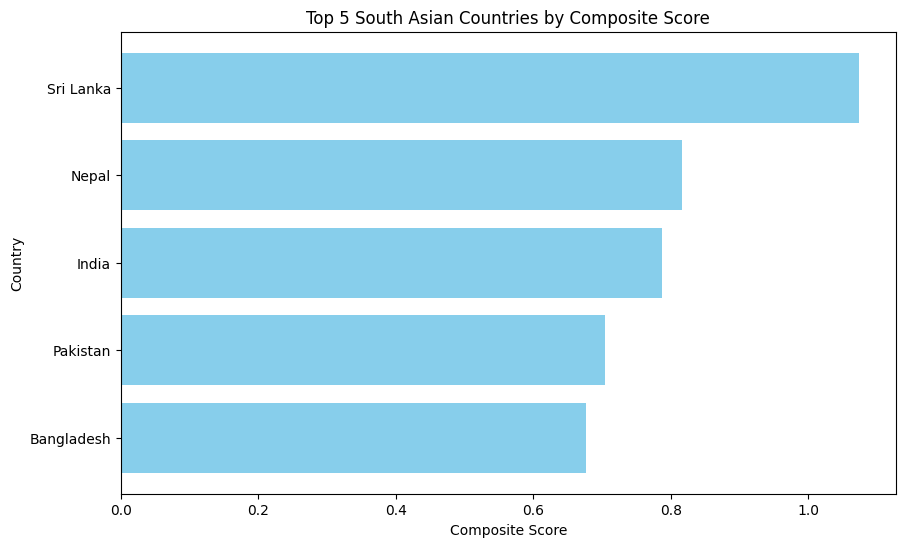

In [46]:
top_5 = south_asia_dataset.head(5)
display(top_5)
plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

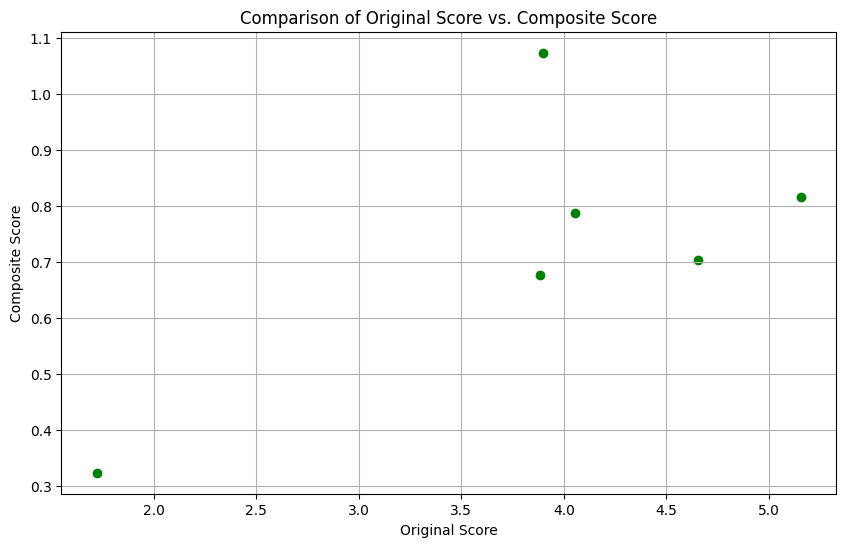

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_dataset['score'], south_asia_dataset['Composite Score'], color='green')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Comparison of Original Score vs. Composite Score')
plt.grid(True)
plt.show()

##Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.


In [25]:
south_asia_dataset = pd.read_csv('south_asia_dataset.csv')

2. Define outliers using the 1.5 × IQR rule.


In [26]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)], lower_bound, upper_bound

outliers_score, score_lower, score_upper = detect_outliers(south_asia_dataset, 'score')
outliers_gdp, gdp_lower, gdp_upper = detect_outliers(south_asia_dataset, 'Log GDP per capita')

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.


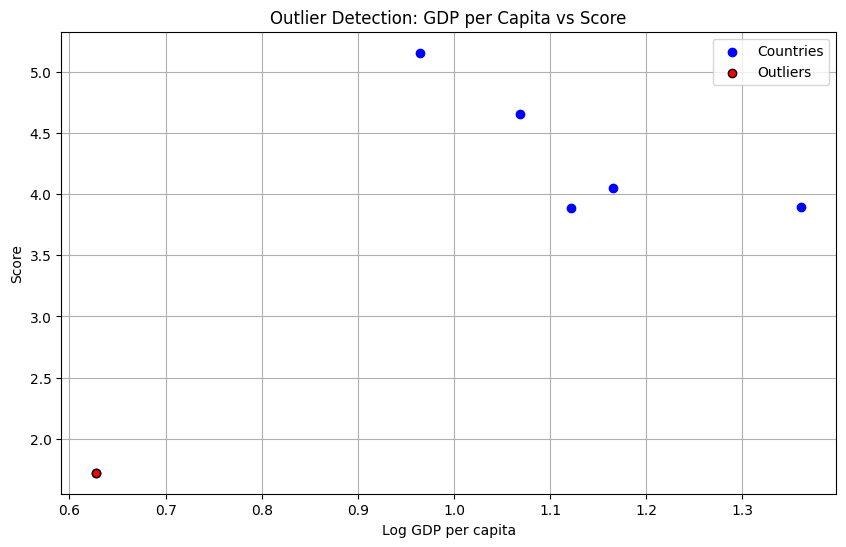

In [27]:
outlier_countries = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_dataset['Log GDP per capita'], south_asia_dataset['score'], color='blue', label='Countries')
plt.scatter(outlier_countries['Log GDP per capita'], outlier_countries['score'], color='red', label='Outliers', edgecolor='k')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Outlier Detection: GDP per Capita vs Score')
plt.legend()
plt.grid(True)
plt.show()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [28]:
print("Outlier Countries Based on Score and GDP per Capita:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])

Outlier Countries Based on Score and GDP per Capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


##Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.


In [29]:
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'
score = 'score'

correlation_metric_1 = south_asia_dataset[metric_1].corr(south_asia_dataset[score])
correlation_metric_2 = south_asia_dataset[metric_2].corr(south_asia_dataset[score])

print(f"Pearson correlation between {metric_1} and Score: {correlation_metric_1:.2f}")
print(f"Pearson correlation between {metric_2} and Score: {correlation_metric_2:.2f}")

Pearson correlation between Freedom to make life choices and Score: 0.80
Pearson correlation between Generosity and Score: 0.87


2. Create scatter plots with trendlines for these metrics against the Score.


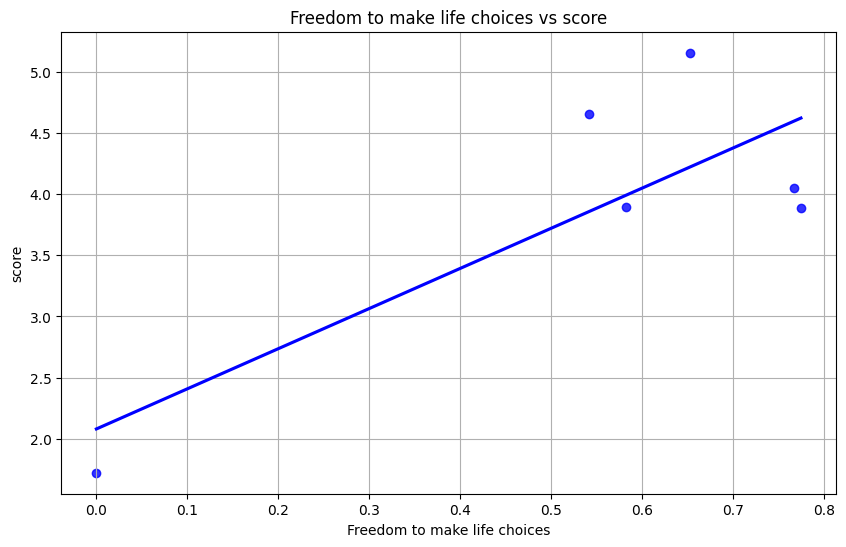

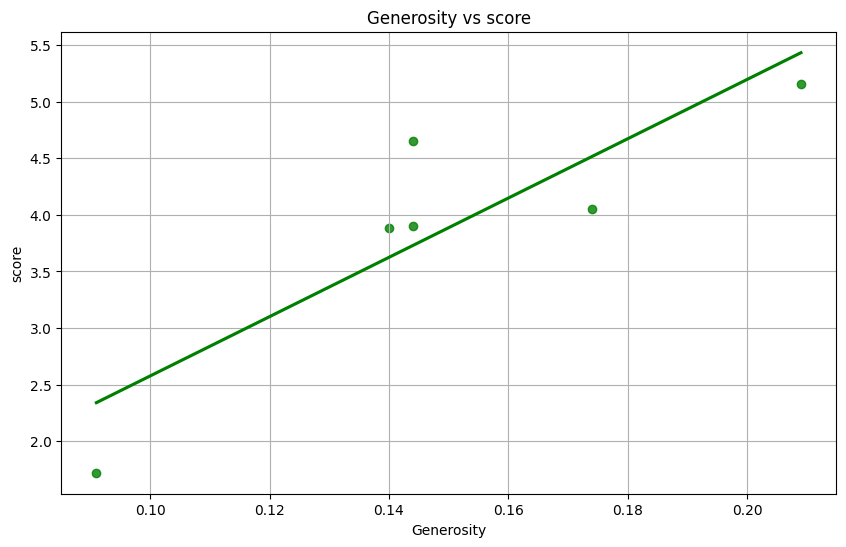

In [30]:
# Scatter plot for Metric 1 vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x=metric_1, y=score, data=south_asia_dataset, ci=None, color='blue')
plt.title(f'{metric_1} vs {score}')
plt.xlabel(metric_1)
plt.ylabel(score)
plt.grid(True)
plt.show()

# Scatter plot for Metric 2 vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x=metric_2, y=score, data=south_asia_dataset, ci=None, color='green')
plt.title(f'{metric_2} vs {score}')
plt.xlabel(metric_2)
plt.ylabel(score)
plt.grid(True)
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [31]:
if abs(correlation_metric_1) > abs(correlation_metric_2):
    strongest_metric = metric_1
    weakest_metric = metric_2
else:
    strongest_metric = metric_2
    weakest_metric = metric_1

print(f"The strongest relationship is between {strongest_metric} and Score with a correlation of {max(correlation_metric_1, correlation_metric_2):.2f}.")
print(f"The weakest relationship is between {weakest_metric} and Score with a correlation of {min(correlation_metric_1, correlation_metric_2):.2f}.")

The strongest relationship is between Generosity and Score with a correlation of 0.87.
The weakest relationship is between Freedom to make life choices and Score with a correlation of 0.80.


##Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.


In [32]:
south_asia_dataset['GDP-Score Gap'] = south_asia_dataset['Log GDP per capita'] - south_asia_dataset['score']

2. Rank the South Asian countries by this gap in both ascending and descending order.


In [33]:
ascending_gap = south_asia_dataset.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_dataset.sort_values(by='GDP-Score Gap', ascending=False)

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
.

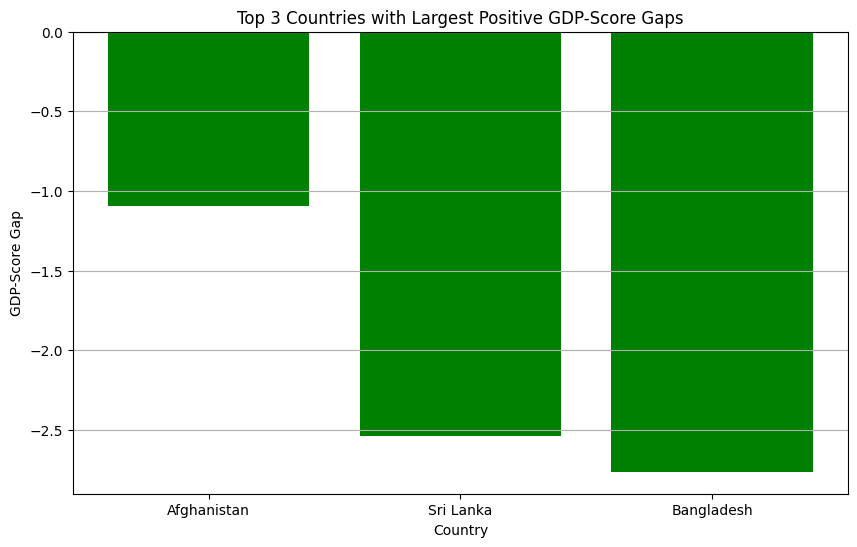

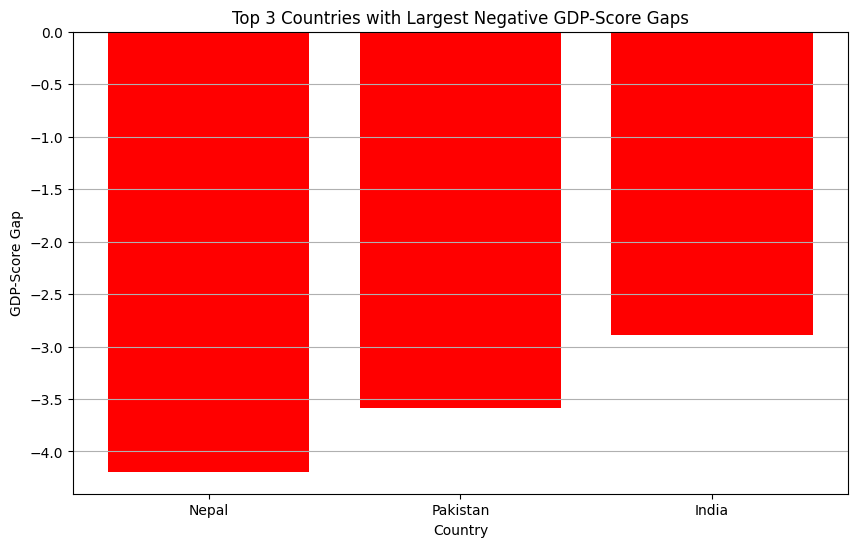

In [34]:
# Top 3 positive gaps
top_positive_gaps = descending_gap.head(3)

# Top 3 negative gaps
top_negative_gaps = ascending_gap.head(3)

# Bar chart for positive gaps
plt.figure(figsize=(10, 6))
plt.bar(top_positive_gaps['Country name'], top_positive_gaps['GDP-Score Gap'], color='green')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.grid(axis='y')
plt.show()

# Bar chart for negative gaps
plt.figure(figsize=(10, 6))
plt.bar(top_negative_gaps['Country name'], top_negative_gaps['GDP-Score Gap'], color='red')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.grid(axis='y')
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries

In [35]:
print("Top 3 Positive Gap Countries:")
print(top_positive_gaps[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("\nTop 3 Negative Gap Countries:")
print(top_negative_gaps[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

Top 3 Positive Gap Countries:
  Country name  Log GDP per capita  score  GDP-Score Gap
5  Afghanistan               0.628  1.721         -1.093
3    Sri Lanka               1.361  3.898         -2.537
4   Bangladesh               1.122  3.886         -2.764

Top 3 Negative Gap Countries:
  Country name  Log GDP per capita  score  GDP-Score Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888


## 3.3 Problem - 3 - Comparative Analysis:
##Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]



In [36]:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
middle_east_dataset = df[df['Country name'].isin(middle_east_countries)]
middle_east_dataset.to_csv('middle_east_dataset.csv', index=False)

print("Middle Eastern dataset prepared and saved as 'middle_east_dataset.csv'.")


Middle Eastern dataset prepared and saved as 'middle_east_dataset.csv'.


Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?


In [37]:
# Load datasets
south_asia_dataset = pd.read_csv('south_asia_dataset.csv')
middle_east_dataset = pd.read_csv('middle_east_dataset.csv')

# Calculate mean and standard deviation for Score in both regions
south_asia_mean = south_asia_dataset['score'].mean()
south_asia_std = south_asia_dataset['score'].std()

middle_east_mean = middle_east_dataset['score'].mean()
middle_east_std = middle_east_dataset['score'].std()

# Determine which region has higher happiness scores
higher_region = "South Asia" if south_asia_mean > middle_east_mean else "Middle East"

print(f"South Asia - Mean: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")
print(f"Region with higher average happiness scores: {higher_region}")


South Asia - Mean: 3.90, Std Dev: 1.18
Middle East - Mean: 5.41, Std Dev: 1.57
Region with higher average happiness scores: Middle East


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.


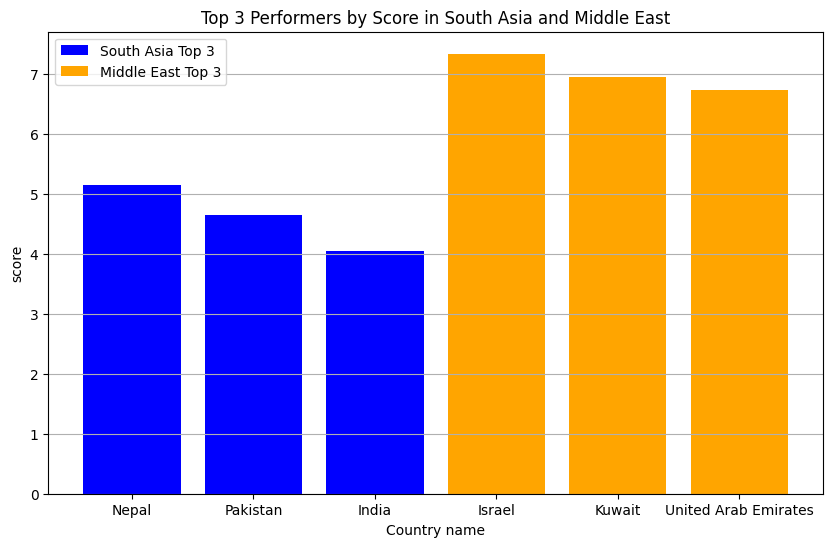

In [38]:
# Identify top 3 and bottom 3 countries based on Score
south_asia_top_3 = south_asia_dataset.nlargest(3, 'score')
south_asia_bottom_3 = south_asia_dataset.nsmallest(3, 'score')

middle_east_top_3 = middle_east_dataset.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_dataset.nsmallest(3, 'score')

# Plot bar charts
plt.figure(figsize=(10, 6))
plt.bar(south_asia_top_3['Country name'], south_asia_top_3['score'], color='blue', label='South Asia Top 3')
plt.bar(middle_east_top_3['Country name'], middle_east_top_3['score'], color='orange', label='Middle East Top 3')
plt.title('Top 3 Performers by Score in South Asia and Middle East')
plt.xlabel('Country name')
plt.ylabel('score')
plt.legend()
plt.grid(axis='y')
plt.show()


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?


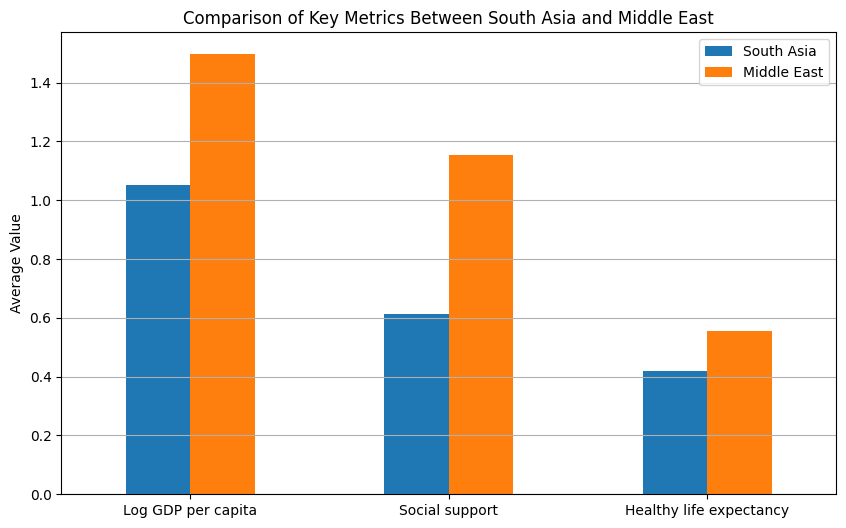

Largest disparity is in: Social support


In [39]:
# Compare key metrics: GDP per Capita, Social Support, Healthy Life Expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

mean_metrics_south_asia = south_asia_dataset[metrics].mean()
mean_metrics_middle_east = middle_east_dataset[metrics].mean()

# Grouped bar chart
mean_metrics = pd.DataFrame({'South Asia': mean_metrics_south_asia, 'Middle East': mean_metrics_middle_east})
mean_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Identify the metric with the largest disparity
disparity = abs(mean_metrics_south_asia - mean_metrics_middle_east)
largest_disparity_metric = disparity.idxmax()
print(f"Largest disparity is in: {largest_disparity_metric}")


4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?


In [40]:
# Compute range and coefficient of variation (CV) for Score
south_asia_range = south_asia_dataset['score'].max() - south_asia_dataset['score'].min()
south_asia_cv = south_asia_dataset['score'].std() / south_asia_dataset['score'].mean()

middle_east_range = middle_east_dataset['score'].max() - middle_east_dataset['score'].min()
middle_east_cv = middle_east_dataset['score'].std() / middle_east_dataset['score'].mean()

print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")

greater_variability = "South Asia" if south_asia_cv > middle_east_cv else "Middle East"
print(f"Region with greater variability in happiness: {greater_variability}")


South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29
Region with greater variability in happiness: South Asia


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.


South Asia Correlations:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  
Middle East Correlations:
                                  score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


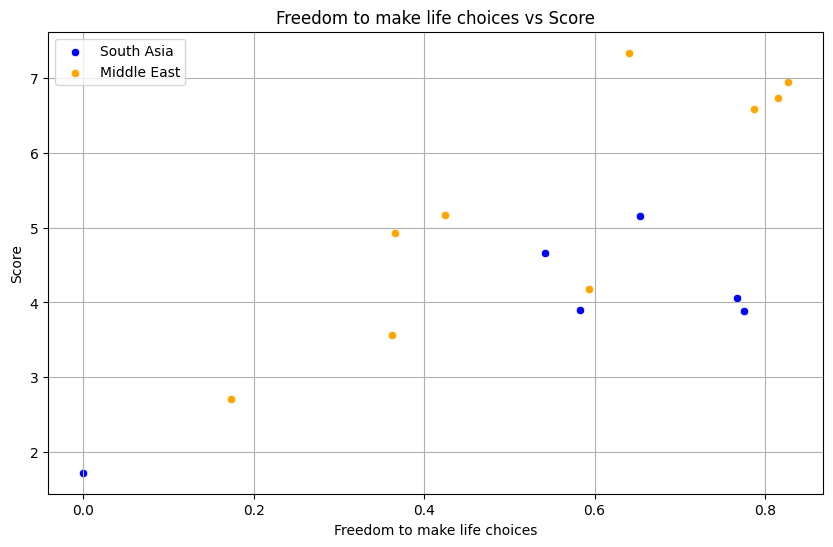

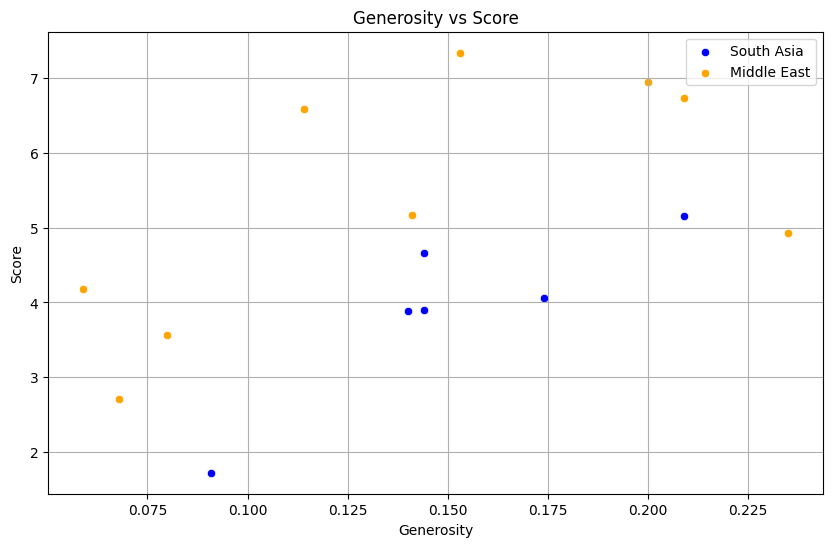

In [41]:
# Correlation of Score with other metrics
correlations_south_asia = south_asia_dataset[['score', 'Freedom to make life choices', 'Generosity']].corr()
correlations_middle_east = middle_east_dataset[['score', 'Freedom to make life choices', 'Generosity']].corr()

print("South Asia Correlations:\n", correlations_south_asia)
print("Middle East Correlations:\n", correlations_middle_east)

# Scatter plots
for metric in ['Freedom to make life choices', 'Generosity']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=metric, y='score', data=south_asia_dataset, label='South Asia', color='blue')
    sns.scatterplot(x=metric, y='score', data=middle_east_dataset, label='Middle East', color='orange')
    plt.title(f'{metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()


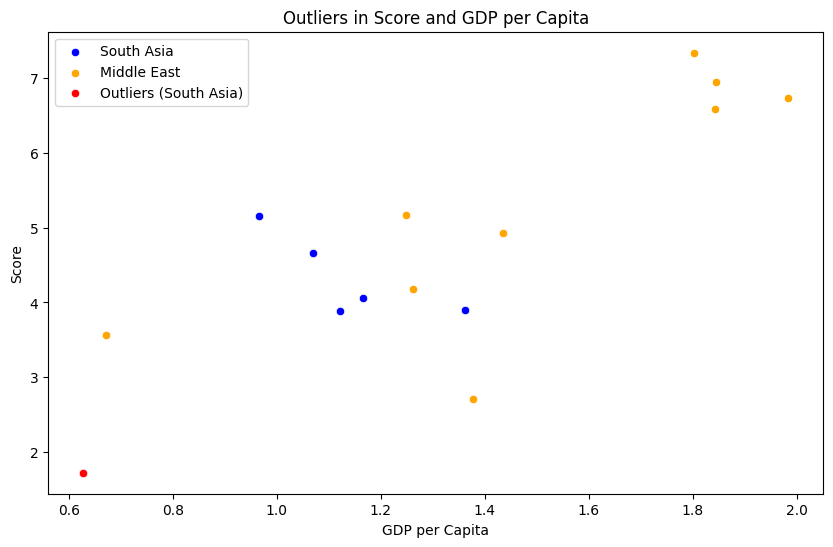

In [42]:
def detect_outliers(column, region_data):
    Q1 = region_data[column].quantile(0.25)
    Q3 = region_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return region_data[(region_data[column] < lower_bound) | (region_data[column] > upper_bound)]

# Use 'south_asia_dataset' instead of 'south_asia_data'
south_asia_outliers = detect_outliers('score', south_asia_dataset)
# Use 'middle_east_dataset' instead of 'middle_east_data'
middle_east_outliers = detect_outliers('score', middle_east_dataset)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
# Use 'south_asia_dataset' instead of 'south_asia_data'
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_dataset, color='blue', label='South Asia')
# Use 'middle_east_dataset' instead of 'middle_east_data'
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_dataset, color='orange', label='Middle East')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='red', label='Outliers (South Asia)')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='green', label='Outliers (Middle East)')
plt.title('Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.
7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.


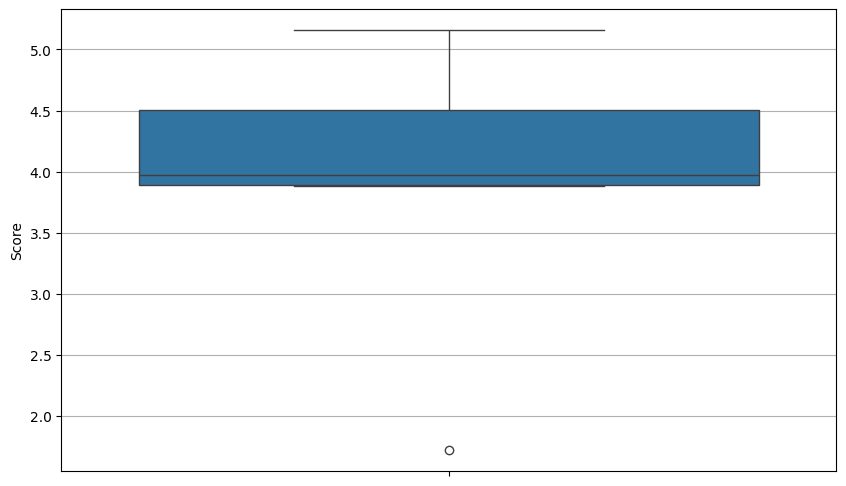

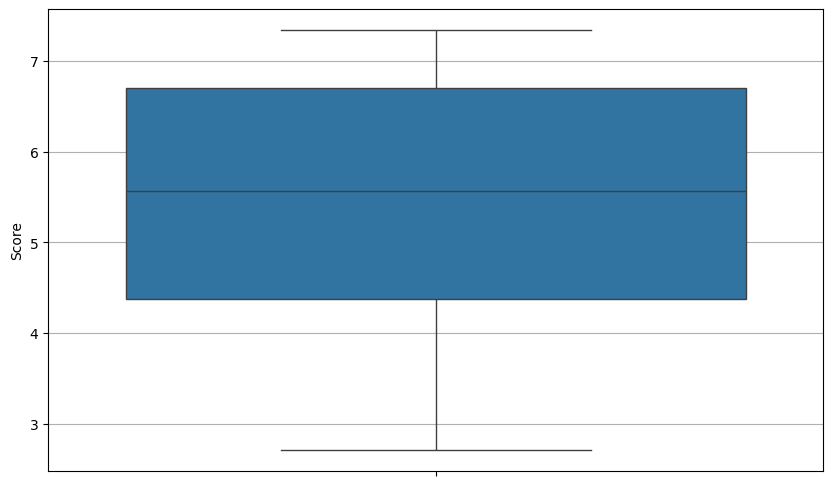

In [43]:
# Boxplots for Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=south_asia_dataset,y='score')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Boxplots for Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=middle_east_dataset,y='score')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()